# Split requests into train/test batches

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
datetime
def plot_count(df_requests, date_start, date_end, max_passenger=4, ax=None):
    
    
    print(ax)
    filter_pu_within_range = df_requests["pickup_datetime"].between(date_start, date_end, inclusive="left")
    
    filter_passenger_count = df_requests["passenger_count"] <= max_passenger
    df_subset_requests = df_requests[filter_pu_within_range & filter_passenger_count]
    df_subset_requests = df_subset_requests[["pickup_datetime", "passenger_count"]]
    print("plotting...")
    ax = df_subset_requests.set_index("pickup_datetime").resample("1T").sum().plot(ax=ax, legend=False)
    ax.set_xticks(pd.date_range(start=date_start, end=date_end, freq='H'), pd.date_range(start=date_start, end=date_end, freq='H').strftime("%H"))
    ax.set_xlabel("Time(h)")
    ax.set_title(date_start.split(" ")[0])
    
def split_into_ranges(datetime_range_list, filepath_requests=None, df_requests=None, output_folder=None):
    n_ranges = len(datetime_range_list)
    print(f"Processing {n_ranges} ranges...")
    fig, axes = plt.subplots(nrows=1, ncols=n_ranges, sharey=True, figsize=(n_ranges*5, 5))
    ax_ranges = zip(axes, datetime_range_list)
    # Setting the values for all axes.
    plt.setp(axes, ylim=[100,400],ylabel="N. of passengers")
    # for a,(b,c) in ax_ranges:
    #     print(a,b,c)
    
    if df_requests is None:
        df_requests = pd.read_csv(filepath_requests, parse_dates=["pickup_datetime", "dropoff_datetime"])
        
    for ax, (date_start, date_end) in ax_ranges:
        
        print(f"Selecting range {date_start} - {date_end} from {len(df_requests)} requests...")
        
        filter_pu_within_range = df_requests["pickup_datetime"].between(date_start, date_end, inclusive="left")
        df_subset_requests = df_requests[filter_pu_within_range]
        print(f"{len(df_subset_requests)} selected.")
        
        plot_count(df_subset_requests, date_start, date_end, max_passenger=4, ax=ax)
        
        def get_short_datetime(d):
            return datetime.strptime(d, "%Y-%m-%d %H:%M:%S").strftime("%Y%m%d%H%M%S")
        filename_excerpt = f"{get_short_datetime(date_start)}-{get_short_datetime(date_end)}_{os.path.basename(filepath_requests)}"
        
        if output_folder is None:
            output_folder = os.path.dirname(filepath_requests)
        
        filepath_excerpt = os.path.join(output_folder, filename_excerpt)
        print(f"Savint to '{filepath_excerpt}'...")
        
        df_subset_requests.to_csv(filepath_excerpt, index=False)
        
        
        
        
        

In [3]:
import pandas as pd
filepath_requests = "/mnt/d/projects/dev/slevels/data/nyc/processed/trip_records/2019-2-yellow-Manhattan-00-00-00-23-59-59.csv"
df_requests = pd.read_csv(filepath_requests, parse_dates=["pickup_datetime", "dropoff_datetime"])
df_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496069 entries, 0 to 5496068
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   pickup_datetime   datetime64[ns]
 2   dropoff_datetime  datetime64[ns]
 3   pickup_zone_id    int64         
 4   dropoff_zone_id   int64         
 5   pickup_node_id    int64         
 6   dropoff_node_id   int64         
 7   trip_distance     float64       
 8   passenger_count   int64         
dtypes: datetime64[ns](2), float64(1), int64(6)
memory usage: 377.4 MB


Processing 6 ranges...
Selecting range 2019-02-04 17:00:00 - 2019-02-04 19:00:00 from 5496069 requests...
26327 selected.
AxesSubplot(0.125,0.125;0.110714x0.755)
plotting...
Savint to '/mnt/d/projects/dev/slevels/data/nyc/processed/trip_records/20190204170000-20190204190000_2019-2-yellow-Manhattan-00-00-00-23-59-59.csv'...
Selecting range 2019-02-05 17:00:00 - 2019-02-05 19:00:00 from 5496069 requests...
26125 selected.
AxesSubplot(0.257857,0.125;0.110714x0.755)
plotting...
Savint to '/mnt/d/projects/dev/slevels/data/nyc/processed/trip_records/20190205170000-20190205190000_2019-2-yellow-Manhattan-00-00-00-23-59-59.csv'...
Selecting range 2019-02-06 17:00:00 - 2019-02-06 19:00:00 from 5496069 requests...
29062 selected.
AxesSubplot(0.390714,0.125;0.110714x0.755)
plotting...
Savint to '/mnt/d/projects/dev/slevels/data/nyc/processed/trip_records/20190206170000-20190206190000_2019-2-yellow-Manhattan-00-00-00-23-59-59.csv'...
Selecting range 2019-02-07 17:00:00 - 2019-02-07 19:00:00 from 54

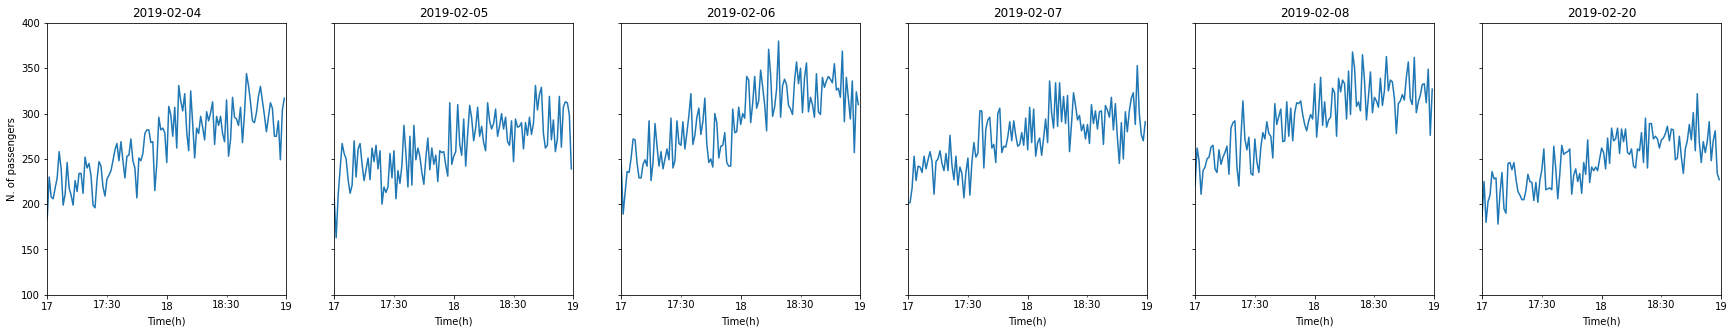

In [4]:
filepath_requests = "/mnt/d/projects/dev/slevels/data/nyc/processed/trip_records/2019-2-yellow-Manhattan-00-00-00-23-59-59.csv"
datetime_range_list = [
          ("2019-02-04 16:00:00", "2019-02-04 20:00:00"),
          ("2019-02-05 16:00:00", "2019-02-05 20:00:00"),
          ("2019-02-06 16:00:00", "2019-02-06 20:00:00"),
          ("2019-02-07 16:00:00", "2019-02-07 20:00:00"),
          ("2019-02-08 16:00:00", "2019-02-08 20:00:00"),
          ("2019-02-20 16:00:00", "2019-02-20 20:00:00")
        ]

datetime_range_list = [
          ("2019-02-04 17:00:00", "2019-02-04 19:00:00"),
          ("2019-02-05 17:00:00", "2019-02-05 19:00:00"),
          ("2019-02-06 17:00:00", "2019-02-06 19:00:00"),
          ("2019-02-07 17:00:00", "2019-02-07 19:00:00"),
          ("2019-02-08 17:00:00", "2019-02-08 19:00:00"),
          ("2019-02-20 17:00:00", "2019-02-20 19:00:00")
        ]
#datetime_range_list = [("2019-02-04 00:00:00", "2019-02-04 00:01:00")]
# output_folder = "/mnt/d"
output_folder = None
split_into_ranges(datetime_range_list, filepath_requests=filepath_requests, df_requests=df_requests, output_folder=output_folder)